In [10]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/Maks/Desktop/Groceries_dataset.csv'
dataset= df= pd.read_csv(file_path)
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
df.shape

(38765, 3)

In [12]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions


,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [13]:
support = (df['itemDescription'].value_counts() / 14963 * 100)
support.head()

itemDescription
whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: count, dtype: float64

In [5]:
!pip install apyori

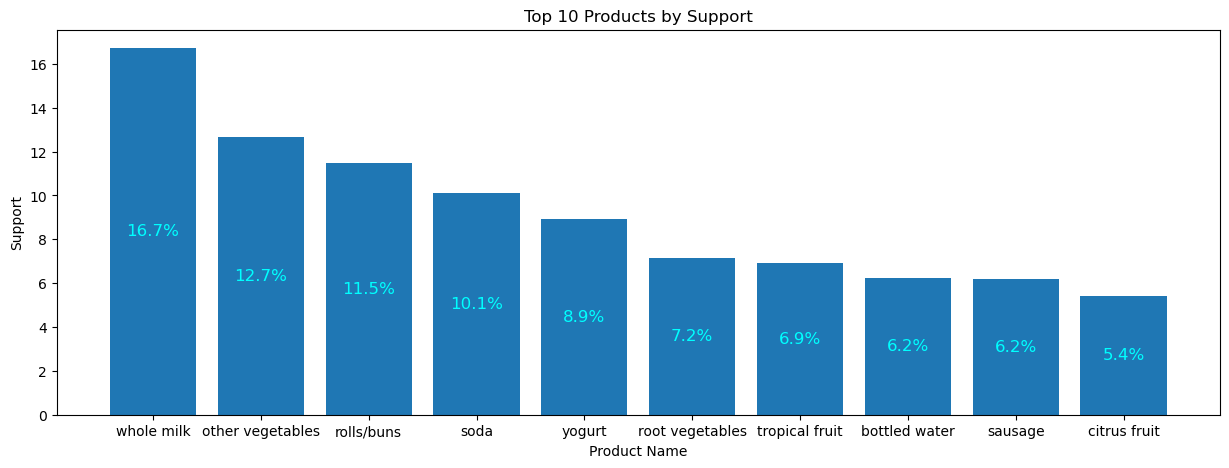

In [17]:
plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(len(support.head(10))), labels = support.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

In [20]:
import matplotlib.pyplot as plt
from apyori import apriori
list_transactions = transactions['itemDescription'].tolist()
list_transactions[:10]



[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [35]:
rules = apriori(list_transactions, min_support=0.001, min_confidence=0.01, min_lift=1.2, max_length=4)
results = list(rules)


In [36]:
def print_top_rules(rules, n=10):
    for i, rule in enumerate(results[:n]):
        items = [item for item in rule.items]
        support = rule.support
        confidence = rule.ordered_statistics[0].confidence
        lift = rule.ordered_statistics[0].lift

        print(f"Rule {i + 1}: {items}, Support: {support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")

print_top_rules(results)

Rule 1: ['beef', 'brown bread'], Support: 0.0015, Confidence: 0.0453, Lift: 1.2033
Rule 2: ['beef', 'frozen vegetables'], Support: 0.0013, Confidence: 0.0374, Lift: 1.3357
Rule 3: ['beef', 'margarine'], Support: 0.0014, Confidence: 0.0413, Lift: 1.2833
Rule 4: ['newspapers', 'beef'], Support: 0.0017, Confidence: 0.0492, Lift: 1.2652
Rule 5: ['beverages', 'sausage'], Support: 0.0015, Confidence: 0.0927, Lift: 1.5368
Rule 6: ['bottled beer', 'sausage'], Support: 0.0033, Confidence: 0.0737, Lift: 1.2220
Rule 7: ['sugar', 'bottled water'], Support: 0.0015, Confidence: 0.0242, Lift: 1.3681
Rule 8: ['canned beer', 'brown bread'], Support: 0.0024, Confidence: 0.0639, Lift: 1.3629
Rule 9: ['butter', 'margarine'], Support: 0.0014, Confidence: 0.0398, Lift: 1.2370
Rule 10: ['citrus fruit', 'candy'], Support: 0.0010, Confidence: 0.0698, Lift: 1.3131


(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

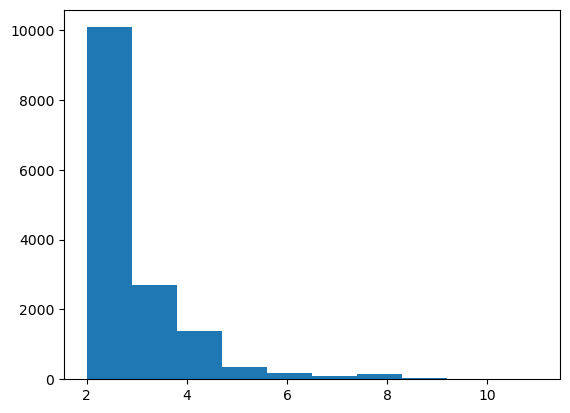

In [37]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)